In [1]:
import pandas as pd
import numpy as np

import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

# Libraries for helping us with strings
import string
# Regular Expression Library
import re
# Import our text vectorizers
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


# Import our classifiers
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier


# Import some ML helper function
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

# Import our metrics to evaluate our model
from sklearn import metrics


# Library for plotting
import matplotlib.pyplot as plt
import seaborn as sns
# You may need to download these from nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
stopwords = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dsouz\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dsouz\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dsouz\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
df = pd.read_csv('./data/train.csv')
df_test = pd.read_csv('./data/test.csv')

In [3]:
df.value_counts()

id     keyword   location                        text                                                                                                                                 target
48     ablaze    Birmingham                      @bbcmtd Wholesale Markets ablaze http://t.co/lHYXEOHY6C                                                                              1         1
7166   mudslide  Chiswick, London                2 great new recipes; mudslide cake and so sorry stew! #GBBO                                                                          0         1
7178   mudslide  Edinburgh                       @hazelannmac ooh now I feel guilty about wishing hatman out. I bet the mudslide was delicious!                                       0         1
7176   mudslide  London                          First impressions: glad hat man is leaving in lieu of more interesting ladies. Hope mudslide lady triumphs next week.                0         1
7174   mudslide  The Pumpkin Carria

In [4]:
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [5]:
df['keyword'].value_counts()

keyword
fatalities               45
deluge                   42
armageddon               42
sinking                  41
damage                   41
                         ..
forest%20fire            19
epicentre                12
threat                   11
inundation               10
radiation%20emergency     9
Name: count, Length: 221, dtype: int64

In [6]:
df['location'].value_counts()

location
USA                    104
New York                71
United States           50
London                  45
Canada                  29
                      ... 
MontrÌ©al, QuÌ©bec       1
Montreal                 1
ÌÏT: 6.4682,3.18287      1
Live4Heed??              1
Lincoln                  1
Name: count, Length: 3341, dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [9]:
df.shape
#location has 2533/7613 as NULL. Losing a lot of value if we get rid of it. Maybe drop location?

(7613, 5)

In [10]:
#text preprocessing

def make_lower(a_string):
    return a_string.lower()



In [11]:
def remove_punctuation(a_string):
    a_string = re.sub(r'[^\w\s]','',a_string)
    return a_string


In [12]:
def remove_stopwords(a_string):
    # Break the sentence down into a list of words
    words = word_tokenize(a_string)
    
    # Make a list to append valid words into
    valid_words = []
    
    # Loop through all the words
    for word in words:
        
        # Check if word is not in stopwords
        if word not in stopwords:
            
            # If word not in stopwords, append to our valid_words
            valid_words.append(word)

    # Join the list of words together into a string
    a_string = ' '.join(valid_words)

    return a_string

In [13]:
def text_pipeline(input_string):
    input_string = make_lower(input_string)
    input_string = remove_punctuation(input_string)
    input_string = remove_stopwords(input_string)
    return input_string

In [14]:
df['text_clean'] = df['text'].apply(text_pipeline)
df_test['text_clean'] = df['text'].apply(text_pipeline)

In [15]:
df_test.head()

,id,keyword,location,text,text_clean
0,0,NaN,NaN,Just happened a terrible car crash,deeds reason earthquake may allah forgive us
1,2,NaN,NaN,"Heard about #earthquake is different cities, s...",forest fire near la ronge sask canada
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are...",residents asked shelter place notified officer...
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires,13000 people receive wildfires evacuation orde...
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan,got sent photo ruby alaska smoke wildfires pou...


In [16]:
df.head()

,id,keyword,location,text,target,text_clean
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,deeds reason earthquake may allah forgive us
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,residents asked shelter place notified officer...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,13000 people receive wildfires evacuation orde...
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,got sent photo ruby alaska smoke wildfires pou...


In [17]:
#vectorization

X = df['text_clean']

y = df['target']




In [18]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.2, random_state=42, stratify=y)


In [19]:
vectorizer = TfidfVectorizer()

In [20]:
vectorizer.fit(X_train)

TfidfVectorizer()

In [21]:
X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)

In [22]:
print(X_train.shape)

(6090, 19282)


In [23]:
model = MultinomialNB()
model.fit(X_train,y_train)

MultinomialNB()

In [24]:
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)
accuracy = model.score(X_test, y_test)

print("Model Accuracy: %f" % accuracy)

#Currently, before editing we are at a 80.9% accuracy when evaluating our training set



Model Accuracy: 0.809586


In [25]:
# #Now I will modify hyperparameters

# from sklearn.model_selection import GridSearchCV
# param_grid = {'alpha': [0.01, 0.1, 0.5, 1.0, 5.0, 10.0]}

# nb = MultinomialNB()

# grid_search = GridSearchCV(nb, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
# grid_search.fit(X_train, y_train)
# print("Best parameters: ", grid_search.best_params_)
# best_nb = grid_search.best_estimator_
# y_pred = best_nb.predict(X_test)
# print(classification_report(y_test, y_pred))

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

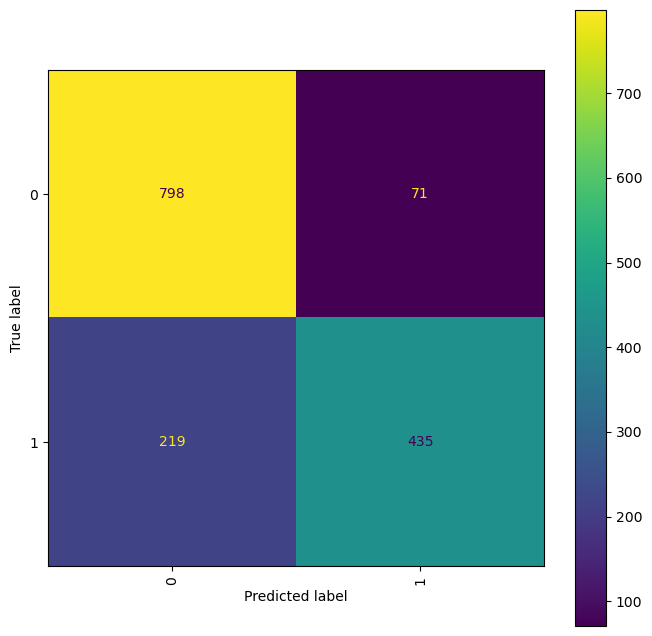

In [26]:
fig, ax = plt.subplots(figsize=(8, 8))
disp = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, ax=ax)
plt.xticks(rotation=90)

In [27]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.92      0.85       869
           1       0.86      0.67      0.75       654

    accuracy                           0.81      1523
   macro avg       0.82      0.79      0.80      1523
weighted avg       0.82      0.81      0.80      1523



Prediction_df is for submissions. First train on the training set so we can do a split there and modify.

In [28]:
# from sklearn.ensemble import RandomForestClassifier


# rf_model = RandomForestClassifier(100)


# # Fit our model with our training data.
# rf_model.fit(X_train, y_train)


# # Make new predictions of our testing data. 
# y_pred = rf_model.predict(X_test)


# # Make predicted probabilites of our testing data
# y_pred_proba = rf_model.predict_proba(X_test)

# # Evaluate our model
# accuracy =  rf_model.score(X_test, y_test)

# # Print our evaluation metrics
# print("Model Accuracy: %f" % accuracy)

# print(classification_report(y_test, y_pred))



```
random forest was worse
```

In [29]:

X_train = df['text_clean']
y_train = df['target']
X_test = df_test['text_clean']

vectorizer.fit(X_train)
X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)

sample_submission = pd.read_csv("./data/sample_submission.csv")
sample_submission.head()
sample_submission["target"] = np.argmax(model.predict(X_test), axis=1)
sample_submission.to_csv("submission.csv", index=False)


ValueError: X has 22540 features, but MultinomialNB is expecting 19282 features as input.